# **Лабораторная работа 2**
# **Прикладная алгебра и численные методы**
## Число обусловленности, круги Гершгорина, итерационные методы решения СЛАУ, теорема Фробениуса-Перрона, PageRank, собственные значения, характеристический многочлен, функции от матриц,  линейное программирование.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import linalg as LA
from scipy.optimize import linprog
import sympy
from IPython.display import Latex, Math

In [2]:
file=r'C:\Users\ILYA\Applied_Alg_2022\Test2_vXX.xlsx'

A1=pd.read_excel(file, sheet_name='A1',header=None).values
b1=pd.read_excel(file, sheet_name='b1',header=None).squeeze("columns").values
Delta_A1=pd.read_excel(file, sheet_name='DeltaA1',header=None).values
Delta_b1=pd.read_excel(file, sheet_name='Deltab1',header=None).squeeze('columns').values

A4=pd.read_excel(file, sheet_name='A4',dtype=complex,header=None).values

A5=pd.read_excel(file,sheet_name='A5',header=None).values
b5=pd.read_excel(file,sheet_name='b5',header=None).squeeze('columns').values

A7=pd.read_excel(file,sheet_name='A7',header=None).values

A9=pd.read_excel(file,sheet_name='A9',header=None,dtype=complex).values

## Задание 1 Число обусловленности. Погрешность решения СЛАУ. 

Считать данные из файла Test2_vXX.xlsx, на листе A1 матрица левой части СЛАУ $AX = b$.

Найти число обусловленности матрицы $A_1$ в нормах 1, 2, inf. 
Вывести на экран найденные значения числа обусловленности.

Считать из файла Test2_vXX.xlsx $b_1$ - вектор правой части СЛАУ, на листе 'b1'.

К матрице  $A_1$ Задания 1 прибавить матрицу искажений с листа  DeltaA1,
к столбцу $b_1$ прибавить столбец искажений с листа  Deltab1. 

Найти решения исходной и искаженной СЛАУ с помощью np.linalg.solve, вычислить норму (1, 2, inf) их разности, вывести на экран решения и нормы их разности.

In [6]:
cond=lambda M,p:np.linalg.cond(M, p=p)

print( *[f'cond(A1, {item})  = {cond(A1,item)}' for item in (1, 2, np.inf)], sep='\n')

sol=LA.solve(A1,b1)
new_sol=LA.solve(A1+Delta_A1,b1+Delta_b1)
norms=[[f'norm({rest}, {item})  = {round(np.linalg.norm(res, ord=item), 2)}' for item in (1, 2, np.inf)] for res,rest in zip([sol,new_sol],['sol','new_sol'])]

print(f'\nsol=\n{sol}\n\nnew_sol=\n{new_sol}\n\n')

for i in norms:
    print( *i, sep='\n')
    
print('\n')
print( *[f'norm(sol-new_sol, {item})  = {round(np.linalg.norm(sol-new_sol, ord=item), 2)}' for item in (1, 2, np.inf)], sep='\n')    

cond(A1, 1)  = 158.7378347362145
cond(A1, 2)  = 30.46002916106172
cond(A1, inf)  = 147.04643142562253

sol=
[-6.  9. -5.  9.  1. -2. -2. -1.  4.  1.  1. -4. -4. -6.  6. -6. -2.  8.
 -8.  5. -3.  5. -6.  4.]

new_sol=
[-5.99965627  8.99989961 -5.00115774  8.99794825  0.99796193 -2.00239587
 -1.99658424 -1.00144452  3.99580848  1.00127245  0.99858012 -3.99856859
 -3.99692559 -6.00156288  6.00213851 -6.00025344 -2.00250579  7.99869097
 -7.99876268  5.00193934 -2.99848862  5.00298926 -5.99576808  4.00211276]


norm(sol, 1)  = 108.0
norm(sol, 2)  = 25.18
norm(sol, inf)  = 9.0
norm(new_sol, 1)  = 107.99
norm(new_sol, 2)  = 25.18
norm(new_sol, inf)  = 9.0


norm(sol-new_sol, 1)  = 0.05
norm(sol-new_sol, 2)  = 0.01
norm(sol-new_sol, inf)  = 0.0


## Задание 2 Погрешность решения СЛАУ. 
Проверить, что для СЛАУ Задания 1 выполняется неравенство:
$$
(1)\qquad\frac{\delta b}{\chi(A)}  \le \delta 
X \le \chi(A)\delta b, \quad где\ \chi(A)\ число\ обусловленности,\quad  \delta 
X = \frac{||\Delta X||}{||X||}, \quad  \delta b = \frac{||\Delta b||}{||b||},
$$
где $\Delta X = X - X^*$ - разность точного решения $X$ СЛАУ $A_1X = b$ и $X^*$ - решения искаженной СЛАУ $A_1X = b^*$, $b^* = b + \Delta b$,
$\Delta b$ - столбец искажений с листа Deltab1.

Внимание!!! $X^*$ не из Задания 1, $X^*$ - решение СЛАУ с неискаженной матрицей левой части $A_1$!

Норма 2-norm, (т.е. для матрицы спектральная, для вектора - Евклидова).

Вывести на экран значения  $\delta X$, $\delta b$, $\frac{\delta b}{\chi(A)}$, $\chi(A)\delta b$ и результат проверки выполнения неравенств (текст "Верно" или "Неверно", он должен быть получен автоматически на основе вычислений).

Показать, что для $X^*$ из Задания 1 неравенства (1) НЕ выполняются.

Показать, что для $X^*$ из Задания 1 выполняется неравенство:
$$
(2)\qquad\frac{\delta b + \delta A}{\chi(A)}  \le \delta 
X \le \chi(A)(\delta b  + \delta A).
$$

In [7]:
def inequality(A,Delta_A,b,Delta_b,p,fully_disdtorted=False):
    solution=LA.solve(A,b)
    
    if fully_disdtorted==False:
        distorted_solution=LA.solve(A,b+Delta_b)
        delta_A=0
    elif fully_disdtorted==True:   
        distorted_solution=LA.solve(A+Delta_A,b+Delta_b)
        delta_A=LA.norm(Delta_A,p)/LA.norm(A,p)
    
    Delta_solution=solution-distorted_solution
    delta_solution=LA.norm(Delta_solution,p)/LA.norm(solution,p)
    delta_b=LA.norm(Delta_b,p)/LA.norm(b,p)
    
    lower_bound=(delta_b+delta_A)/cond(A,p)
    upper_bound=(delta_b+delta_A)*cond(A,p)
    
    return lower_bound,delta_solution,upper_bound,delta_b,delta_A

lower_bound1,delta_solution1,upper_bound1,delta_b,_=inequality(A1,Delta_A1,b1,Delta_b1,2)
lower_bound2,delta_solution2,upper_bound2,delta_b,delta_A1=inequality(A1,Delta_A1,b1,Delta_b1,2,True)

print(f'delta_solution1={delta_solution1}')
print(f'delta_b={delta_b}')
print(f'lower_bound1={lower_bound1}')
print(f'upper_bound1={upper_bound1}\n')

print(lower_bound1<=delta_solution1<=upper_bound1)
print(lower_bound1<=delta_solution2<=upper_bound1)
print(lower_bound2<=delta_solution2<=upper_bound2)


delta_solution1=1.563504323088182e-05
delta_b=3.831495628983537e-06
lower_bound1=1.257876546579769e-07
upper_bound1=0.00011670746858931905

True
False
True


## Задание 3 Погрешность обратной матрицы. 
Для матрицы $A_1$ Задания 1 оценить сверху погрешность приближения обратной матрицы $\hat A = A_1 + \Delta A_1$ при условии, что $\Delta A_1$ -  матрица  искажений с листа  DeltaA1 файла Test2_vXX.xlsx. 
Для оценки использовать неравенство 
$$
(3)\qquad \delta  A_1^{-1} \le \frac{\chi(A_1)\delta A_1}{1 - \chi(A_1)\delta A_1}, \quad 
  \delta  A_1^{-1} = \frac{||{\hat A_1}^{-1} - A_1^{-1}||}{||A_1^{-1}||},\quad 
 \delta A_1 = \frac{||\Delta A_1||}{||A_1||}.
$$

Найти обратные матрицы для $A_1$ и $\hat A_1$. Сравнить $\delta  A_1^{-1} = \frac{||{\hat A_1}^{-1} - A_1^{-1}||}{||A_1^{-1}||}$ и правую часть неравенства, проверить выполнение неравенства.

Вывести на экран значение левой и правой частей неравенства  и результат проверки выполнения неравенств (текст "Верно" или "Неверно", он должен быть получен автоматически на основе вычислений).

In [15]:
distorted_A1=[[-1,6],[4,-1]]
distorted_A1_inv=LA.inv(distorted_A1)
delta_A1=LA.norm(0.01*np.array([[1,1],[1,1]]),ord=1)/LA.norm(distorted_A1)
upper_bound_inv=np.linalg.cond(distorted_A1,1)*delta_A1/(1-np.linalg.cond(distorted_A1,1)*delta_A1)

upper_bound_inv

0.0058321255191607895

## Задание 4 Круги Гершгорина.

Для матрицы $A_4$ из файла  Test2_vXX.xlsx (лист A4) изобразить на графике круги Гершгорина. 


Красными плюсами отметить на отдельном графике собственные значения матрицы $A_4$.

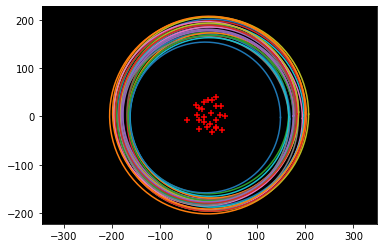

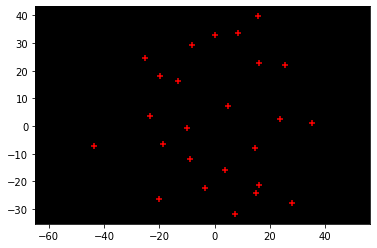

In [9]:
def Gershgorin_circle(M):
    centers=np.diag(M)
    radius=[sum(abs(i)) for i in M]-abs(centers)
    eigvals=LA.eigvals(M)
    
    t=np.linspace(0,2*np.pi,200)
    x=np.cos(t)
    y=np.sin(t)
    
    fig,ax=plt.subplots()
    ax.set_facecolor('black')
    ax.axis('equal')
    
    fig1,ax1=plt.subplots()
    ax1.set_facecolor('black')
    ax1.axis('equal')
    
    for c,r,l in zip(centers,radius,eigvals):
        ax.plot(x*r+np.real(c),y*r+np.imag(c))
        ax1.scatter(np.real(l),np.imag(l),c='red',marker='+')
        ax.scatter(np.real(l),np.imag(l),c='red',marker='+')     
    return
Gershgorin_circle(A4)

## Задание 5 Итерационные методы решения СЛАУ.
Написать функцию, решающую СЛАУ методом верхней релаксации (с выбором оптимального значения $\tau$). По умолчанию точность 0.01. 
Решить с помощью этой функции СЛАУ из файла Test2_vXX.xlsx (на листе A5 матрица левой части, на листе b5 - вектор правой части).

In [19]:
A5=np.array([[27,6,8],[6,19,3],[3,8,26]])
b=np.array([6,8,5])
def solver(A,b,tau, convergence_criteria):
    x0=b
    L = scipy.linalg.tril(A, -1)
    D = scipy.linalg.triu(scipy.linalg.tril(A, 0), 0)
    inv=np.linalg.inv(D-tau*L)
    for i in range(1):
        x_new=inv@(tau*(b-A@x0))+x0
        x0=x_new
    return x_new 


vals=np.linalg.eigvals(A5)
vals=np.sort(vals)

initial_guess = np.zeros(A5.shape[0])
residual_convergence = 1e-8
omega =0.5
solver(A5,b,0.)

array([ 1.48148148,  2.15497076, -0.14068826])

In [11]:
%%timeit
sor_solver(A5, b5, omega, initial_guess, residual_convergence)


12.9 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%%timeit
solver(A5, b5,2/(vals[0]+vals[-1]), residual_convergence)

71.6 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Задание 6 Теорема Фробениуса-Перрона.

Для графа из файла Test2_graph6_vXX.jpg построить и вывести на экран матрицу смежности. Найти и вывести на экран модули всех собственных значений матрицы смежности, максимальное по модулю собственное значение матрицы смежности и соответствующий (положительный!) единичный собственный вектор (норма 2).

Проверить, что модули остальных собственных значений меньше.

In [13]:
A6=[[0,3,0,0,7],[3,0,2,0,1],[0,2,0,1,3],[0,0,1,0,9],[7,1,3,9,0]]
vals,vects=np.linalg.eig(A6)
vects*=-1
argmax=np.argmax(vals)
display(A6)
print('eigenvalues:',*abs(vals))
print(f'max_eigenvalue is\t{round(vals[argmax],2)},\tvector:{vects[argmax]},length={np.linalg.norm(vects[argmax])}')
print(f'\nis the biggest {vals[argmax]}?\t{all(vals[argmax]>=abs(vals))}')

[[0, 3, 0, 0, 7],
 [3, 0, 2, 0, 1],
 [0, 2, 0, 1, 3],
 [0, 0, 1, 0, 9],
 [7, 1, 3, 9, 0]]

eigenvalues: 11.68554973478659 12.478034011284485 3.2591194131852443 0.21287873850486883 2.2537563981824804
max_eigenvalue is	12.48,	vector:[0.07870656 0.19535643 0.67288735 0.17359384 0.68755286],length=1.0

is the biggest 12.478034011284485?	True


## Задание 7.
Найти самую влиятельную вершину в графе, заданном матрицей смежности из файла Test2_vXX.xlsx, на листе A7.

In [14]:
def task7(A):
    x0=np.array([1,1,1,1])

    for i in range(20):
        x0=A@x0
        
    x0=x0/LA.norm(x0)
    vects=np.real(LA.eig(A)[1])
    for i in range(len(vects)):
        if np.allclose(vects[:,i],x0) or np.allclose(vects[:,i],-x0):
            print(f'the {i+1}th node is the most influential')
            print('\n',x0)
            print('\n',vects)
        break
            
task7(A7)

the 1th node is the most influential

 [0.50290124 0.29902236 0.19028696 0.78833168]

 [[-0.50290124 -0.21038336 -0.21038336  0.22947508]
 [-0.29902236  0.45687914  0.45687914  0.23765733]
 [-0.19028696  0.30209158  0.30209158 -0.85876771]
 [-0.78833168 -0.54858736 -0.54858736  0.39163529]]


## Задание 8 Собственные значения.
## Метод вращений (Якоби)
Методом вращений найти собственные числа и собственные векторы матрицы из файла Test2_vXX.xlsx (лист A8). 

Записать в файл Problem8res.xlsx на лист 'Eigen values' собственные числа и соответствующие собственные векторы (в строчку!), собственные числа служат индексами.

In [3]:
def Tij(Ak, i, j):
    aii, ajj, aij = [Ak[i, j] for (i, j) in ((i, i), (j, j), (i, j))]
    if aij == 0:
        return np.eye(Ak.shape[0])
    if np.allclose(aii, ajj):
        cosphi = sinphi = np.sqrt(2) / 2
        if aij < 0:
            sinphi *= -1
    else:
        tan2phi = 2 * aij / (aii - ajj)
        cos2phi = 1 / np.sqrt(1 + tan2phi ** 2) 
        cosphi = np.sqrt((1 + cos2phi) / 2) 
        sinphi = np.sqrt((1 - cos2phi) / 2)   
        if aij * (aii - ajj) < 0:
            sinphi *= -1
    Ak1 = np.eye(Ak.shape[0])
    Ak1[i, i] = Ak1[j, j] = cosphi
    Ak1[i, j] = -sinphi
    Ak1[j, i] = sinphi   
    return Ak1

def jacobi_my(A, tol=0.001, max_iter=1000):
    n = A.shape[0]
    Ak = A
    Tk = np.eye(n)
    for k in range(max_iter):
        ij = np.argmax(abs(Ak - np.diag(np.diag(Ak)))) # argmax возвращает номер максимального элемента в развернутом (flatten) массиве.
        i = ij // n
        j = ij % n
        if abs(Ak[i, j]) < tol:
            break
        print(Ak,'\n')    
        Tij_ = Tij(Ak, i, j)
        print(Tij_,'\n')
        Ak = Tij_.T @ Ak @ Tij_
        Tk = Tk @ Tij_
    if np.max(abs(Ak - np.diag(np.diag(Ak)))) > tol:
        return (np.zeros(Ak.shape[0]), np.zeros(Ak.shape[0]), k)  
    return (Ak, Tk, k) 

A2=-1*np.array([[1,2,2],[2,2,7],[2,7,2]])
Lambda, Tmatr, iter_num = jacobi_my(A2, tol=0.001, max_iter=100000)
print(f'Lambda[:10, :10]\n{Lambda[:10, :10].round(2)}\nT[:10, :10]\n{Tmatr[:10, :10].round(2)}\nчисло итераций {iter_num}')

[[-1 -2 -2]
 [-2 -2 -7]
 [-2 -7 -2]] 

[[ 1.          0.          0.        ]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678  0.70710678]] 

[[-1.          0.         -2.82842712]
 [ 0.          5.          0.        ]
 [-2.82842712  0.         -9.        ]] 

[[ 0.95302061  0.          0.30290545]
 [ 0.          1.          0.        ]
 [-0.30290545  0.          0.95302061]] 

Lambda[:10, :10]
[[-0.1  0.  -0. ]
 [ 0.   5.   0. ]
 [-0.   0.  -9.9]]
T[:10, :10]
[[ 0.95  0.    0.3 ]
 [-0.21  0.71  0.67]
 [-0.21 -0.71  0.67]]
число итераций 2


## Задание 9 Характеристический многочлен. Функции от матриц.
Для матрицы $A_9$ из файла Test2_vXX.xlsx, лист A9, вычислить $\cos(A_9) + i\sin(A_9)$. 
По формулам Ньютона найти коэффициенты характеристического многочлена матрицы $\cos(A_9) + i\sin(A_9)$. Составить и вывести на экран характеристический многочлен.


In [3]:
A=LA.cosm(A9)+1j*LA.sinm(A9)
n = A.shape[1]
x=sympy.Symbol('x')
p_k = [np.trace(np.linalg.matrix_power(A, k)) for k in range(1, n + 1)]
b1 = -p_k[0]
b2 = -((p_k[1] + b1*p_k[0])/2)
b3 = -((p_k[2] + b1*p_k[1] + b2*p_k[0])/3)
b4 = -((p_k[3] + b1*p_k[2] + b2*p_k[1] + b3*p_k[0])/4)
my_poly3 = sum([item*x**(4 - k) for k, item in enumerate([1, b1, b2, b3, b4])])   
display(my_poly3)

x**4 + x**3*(1151686.14907013 + 346235.412324702*I) + x**2*(298441.828979492 + 2162099.14764404*I) + x*(-1014692.19504801 + 645299.210123698*I) + 43300049.9130859 - 72238617.4371338*I

## Задание 10  Линейное программирование.

Решить симплекс методом задачу линейного программирования
$$
z=2x_1+5x_2\to\max\\
\left\{
\begin{matrix}
2x_1-5x_2\ge0\\
x_1+x_2\le10\\
x_1+8x_2\le17\\
x_1,x_2\ge0    
\end{matrix}
\right.
$$

In [23]:
f=[[-2],[-5]]
M=[[-2,5],[1,1],[1,8]]
b = [[0], [10], [17]]
x1_bounds = (0, None)
x2_bounds = (0, None)
res = linprog(f, A_ub=M, b_ub=b, bounds=[x1_bounds, x2_bounds])
res

     con: array([], dtype=float64)
     fun: -22.999999776850544
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1.29999999e+01, 8.83994034e-08, 1.96550914e-07])
  status: 0
 success: True
       x: array([8.99999993, 0.99999998])

In [125]:
k=100
A=np.array([[27,6,8],[6,19,3],[3,8,26]])
b=np.array([6,8,5])
E=np.identity(3)
res=np.linalg.solve(A,b)
res

array([0.12048398, 0.37295501, 0.06365031])

In [118]:
P=np.array([[0,6/27,8/27],[6/19,0,3/19],[3/26,8/26,0]])*(-1)
bn=np.array([6/27,8/19,5/26])

In [150]:
x_prev=np.array([0,0,0])
x_new=np.array([5,5,5])
k=0
while np.linalg.norm(x_new-res,np.inf)>0.001:
    k=k+1
    x_new=P@x_prev+bn
    x_prev=x_new
k    

8

In [151]:
x_new

array([0.11998251, 0.37247696, 0.06320925])

In [152]:
import math
eps=0.001
math.log((1-np.linalg.norm(P,np.inf))*eps/np.linalg.norm(bn,np.inf),np.linalg.norm(P,np.inf))

10.31342326418903